**IMPORTING REQUIRED LIBRARIES**

In [126]:
#to ignore the warinings
import warnings
warnings.filterwarnings('ignore')

#importing necessary libraries for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt

**LOADING THE DATA**

In [127]:
#loading the loan.csv file and converting into dataframe using pandas
loan_df=pd.read_csv("loan.csv", low_memory=False)

**READING THE DATA**

In [128]:
# Number of rows and columns
print('Number of Columns:',loan_df.shape[1])
print('Number of Rows:',loan_df.shape[0])
# Number of missing values
print('Number of missing values:',loan_df.isnull().sum().sum())
# Number of duplicates
print('Number of duplicates:',loan_df.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of duplicates: 0


In [129]:
#printing first 5 and last 5 rows to check if any summary rows, headers or footers are present in dataframe.
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [130]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CHECKING FOR COLUMNS WITH NULL VALUES**

In [131]:
#checking for missing values in columns
print(loan_df.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [132]:
#checking if there are null values or blanks(in percentage)
print((loan_df.isnull().sum()/loan_df.shape[0]*100).round(2))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [133]:
#printing the total number of columns and the list of names of the null columns
print("Total columns with null values: ", len(loan_df.columns[loan_df.isnull().all()].tolist()))
print(list(loan_df.columns[loan_df.isnull().all()]))

Total columns with null values:  54
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'tot

**DELETING THE COLUMNS WITH NULL VALUES**

In [134]:
#deleting the null columns
loan_df=loan_df.dropna(axis=1, how="all")
#checking the data
loan_df.shape
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [135]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

**CHECKING FOR OLUMNS IRRELEVANT FOR THE ANALYSIS AND REMOVING SUCH COLUMNS**

In [136]:
loan_df=loan_df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_df=loan_df.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_df=loan_df.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_df=loan_df.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_df=loan_df.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 26)


In [137]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

**CHECKING FOR COLUMNS WITH UNIQUE VALUES AND REMOVING SUCH COLUMNS**

In [138]:
print(loan_df.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [139]:
# Removing irrelevant columns which contain 1 unique value
loan_df = loan_df.loc[:,loan_df.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 18)


In [140]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

**FIXING THE COLUMNS WITH NULL VALUES**

In [141]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [142]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_df.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [143]:
# Removing null values in emp_title and emp_length columns
loan_df = loan_df.dropna(subset=['emp_length'])

In [144]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_df.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64


In [145]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [146]:
# Checking for missing values across the dataframe again
print(loan_df.isnull().sum().sort_values(ascending=False))

id                      0
loan_amnt               0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64


In [147]:
#No null values are present now, let's also check the shape
loan_df.shape

(38642, 18)

**CHECKING THE DATA TYPES OF THE COLUMNS AND CORRECTING IT**

In [148]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [149]:
loan_df.term=loan_df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_df.int_rate=loan_df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_df.grade=loan_df.grade.astype('category')
loan_df.sub_grade=loan_df.sub_grade.astype('category')
loan_df.emp_length=loan_df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_df.home_ownership=loan_df.home_ownership.astype('category')
loan_df.verification_status=loan_df.verification_status.astype('category')
loan_df.issue_d=pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df['issue_year']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_month']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.month
loan_df.purpose=loan_df.purpose.astype('category')
loan_df.addr_state=loan_df.addr_state.astype('category')

In [150]:
loan_df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


In [151]:
#Delete loan status = 'Current' as it is unneccessary in our case study. We will focus on 'Fully Paid' and 'Charged Off' customers
loan_df=loan_df[loan_df['loan_status']!='Current']
loan_df.shape

(37544, 20)

In [152]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month'],
      dtype='object')

In [153]:
loan_df = loan_df[['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']]
loan_df.shape

(37544, 18)

In [154]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt', 'intsallment', 'int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

**IDENTIFYING AND REMOVING OUTLIERS**

<Axes: >

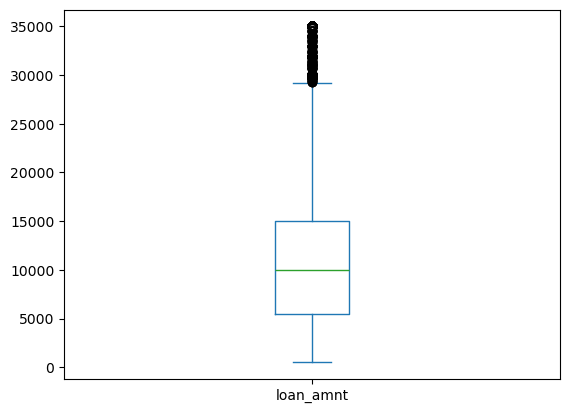

In [155]:
loan_df['loan_amnt'].describe()
loan_df['loan_amnt'].plot(kind='box')

In [156]:
loan_df['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

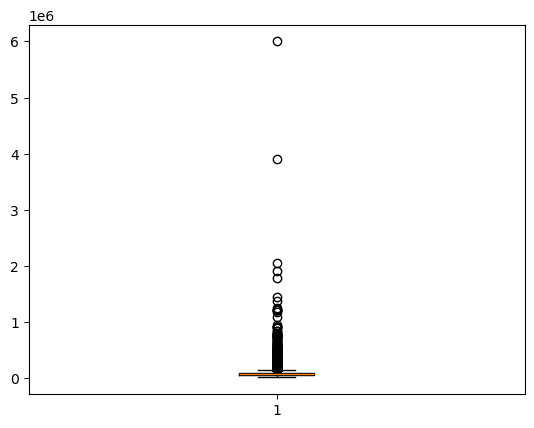

In [157]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

In [173]:
loan_df['annual_inc'].describe()

count     33860.000000
mean      59852.055516
std       26953.253924
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

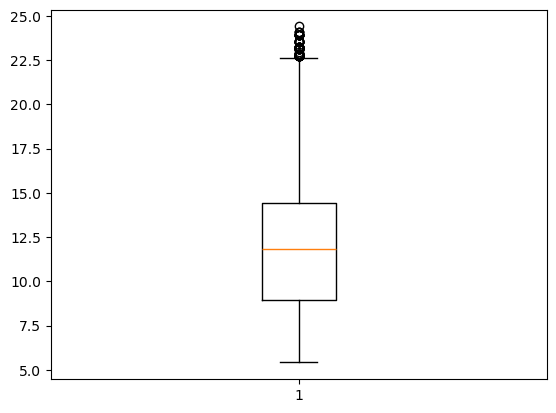

In [159]:
plot.boxplot(loan_df['int_rate'])
plot.show()

In [160]:
loan_df['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

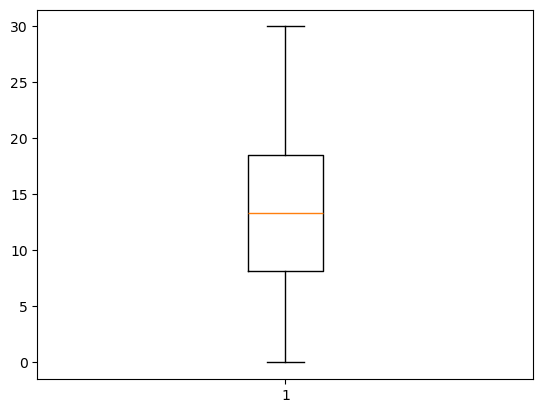

In [161]:
plot.boxplot(loan_df['dti'])
plot.show()

In [162]:
loan_df['dti'].describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

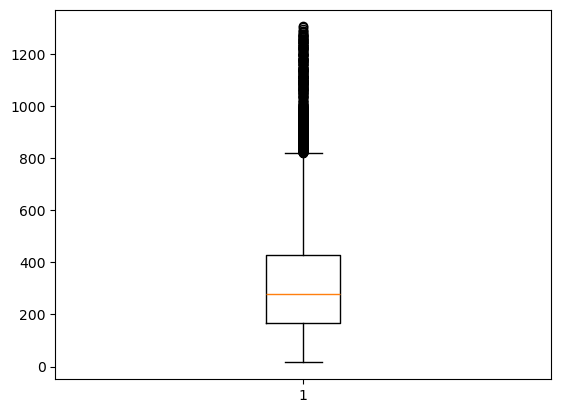

In [163]:
plot.boxplot(loan_df['installment'])
plot.show()

In [164]:
loan_df['installment'].describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

In [165]:
outliers_set1=['loan_amnt']
outliers_set2=['annual_inc', 'int_rate', 'installment']

#Function to remove the outliers
def remove_outliers(data, columns, threshold):
    for col in columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound=Q1-threshold*IQR
        upper_bound=Q3+threshold*IQR
        data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)] 
    return data

#Remove the outliers
loan_df=remove_outliers(loan_df,outliers_set1,1.5)
loan_df=remove_outliers(loan_df,outliers_set2,1.5)

<Axes: >

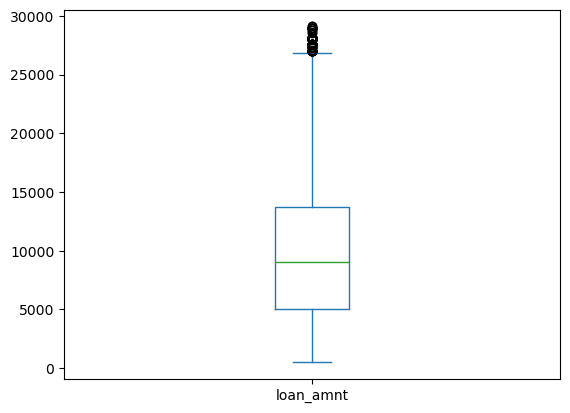

In [166]:
loan_df['loan_amnt'].describe()
loan_df['loan_amnt'].plot(kind='box')

In [170]:
loan_df['loan_amnt'].describe()

count    33860.000000
mean      9833.512256
std       5847.179869
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29100.000000
Name: loan_amnt, dtype: float64

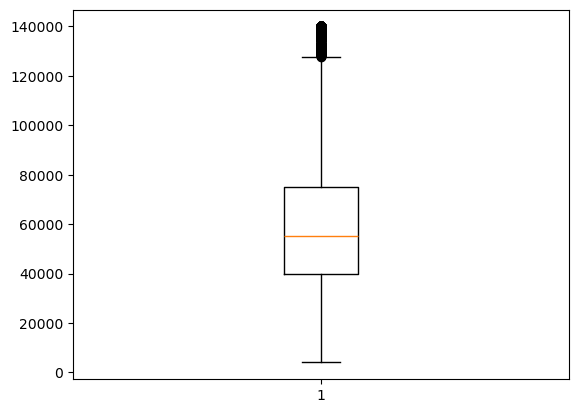

In [171]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

In [174]:
loan_df['annual_inc'].describe()

count     33860.000000
mean      59852.055516
std       26953.253924
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

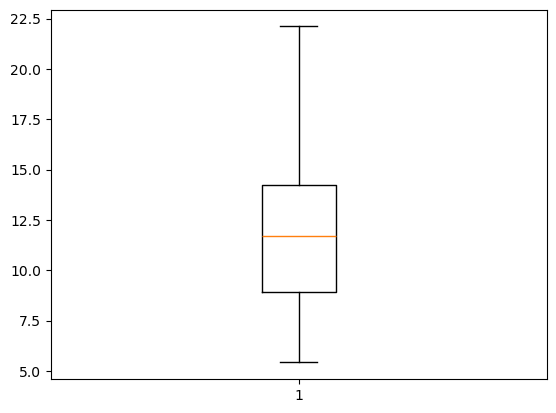

In [175]:
plot.boxplot(loan_df['int_rate'])
plot.show()

In [176]:
loan_df['int_rate'].describe()

count    33860.000000
mean        11.768605
std          3.577210
min          5.420000
25%          8.900000
50%         11.710000
75%         14.220000
max         22.110000
Name: int_rate, dtype: float64

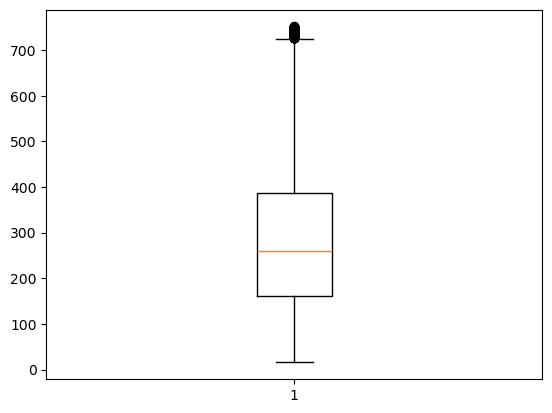

In [177]:
plot.boxplot(loan_df['installment'])
plot.show()

In [178]:
loan_df['installment'].describe()

count    33860.000000
mean       286.966615
std        161.600139
min         15.690000
25%        161.060000
50%        260.845000
75%        386.700000
max        751.640000
Name: installment, dtype: float64

**UNIVARIATE ANALYSIS**

loan_status
Fully Paid     85.773774
Charged Off    14.226226
Name: count, dtype: float64


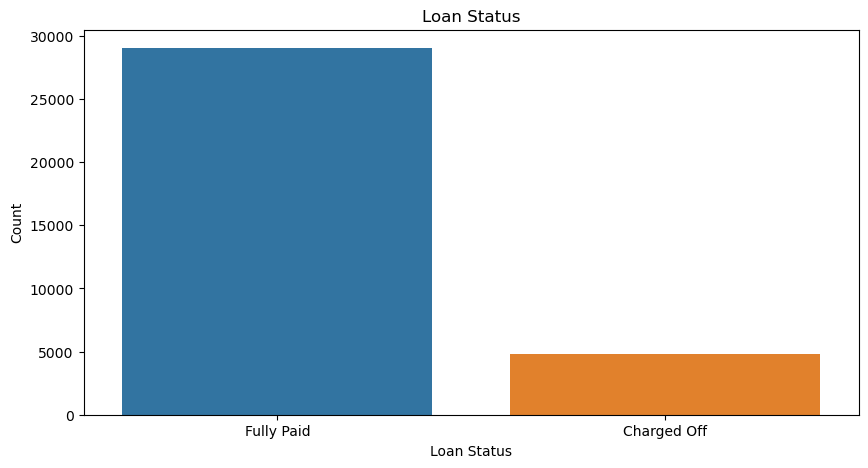

In [179]:
print(loan_df['loan_status'].value_counts()*100/loan_df.loan_status.count())
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='loan_status', data=loan_df, ax=ax)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plot.show()

**Insights:**
1. The number of applicants who have fully paid the loan is more than the applicants who are yet to pay the loan.
2. Around 85% of the applicants have paid the loan.

term
36    76.281748
60    23.718252
Name: count, dtype: float64


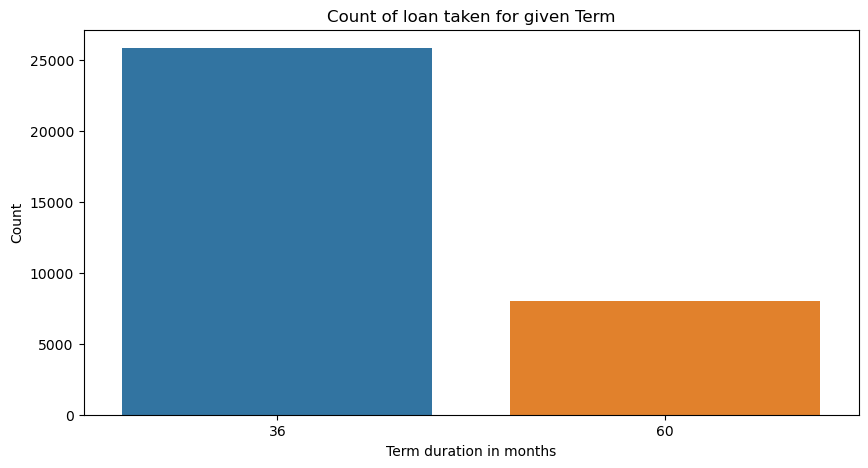

In [181]:
print(loan_df['term'].value_counts()*100/loan_df.loan_status.count())
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='term', data=loan_df, ax=ax)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plot.show()

**Insights:**
1. The Tenure Period (Term) is either 36 months or 60 months.
2. Majority of the people have opted for 36 months tenure period.

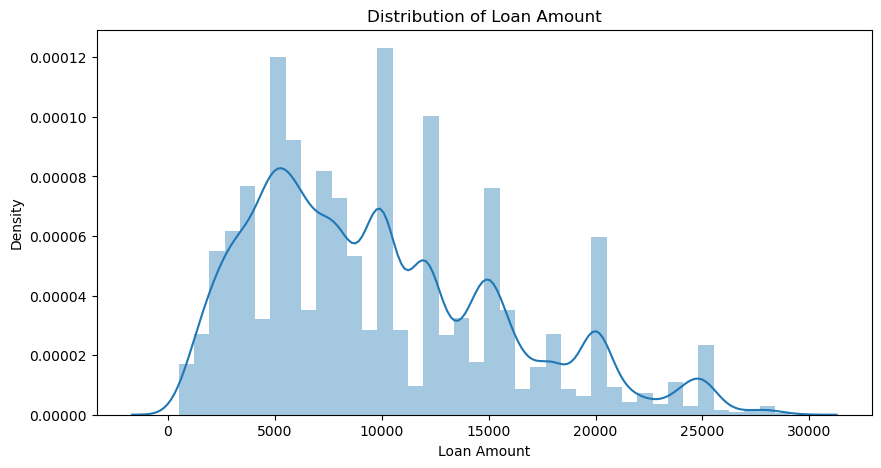

In [182]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.distplot(sorted(loan_df['loan_amnt']),kde=True,bins=40)
ax.set_title('Distribution of Loan Amount')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. Loan amount ranges between 500 to 35000.
2. Majority of the loan amount is less than 15000.
3. Most people have opted for loan amount with rounded values 5000, 10000, 12000.

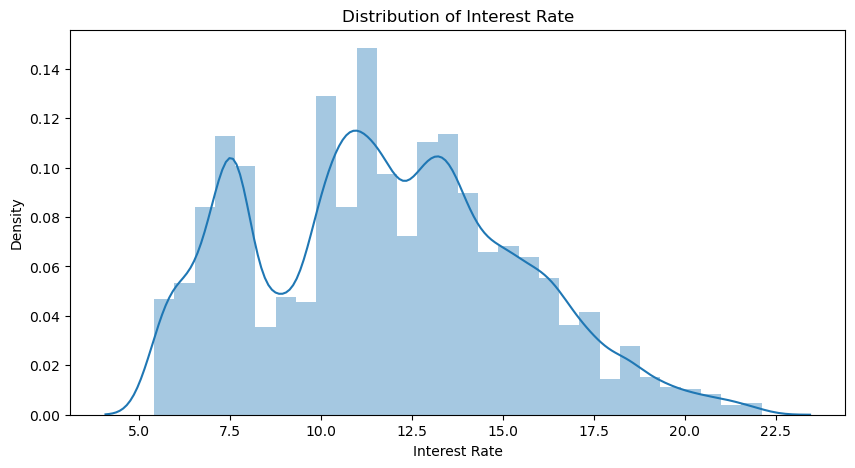

In [183]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.distplot(sorted(loan_df['int_rate']),kde=True,bins=30)
ax.set_title('Distribution of Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. The Interest Rate is at peak between 10%-12.5% followed by 7.5%/
2. The Interest Rate hits drastic low between 7.5%-10%

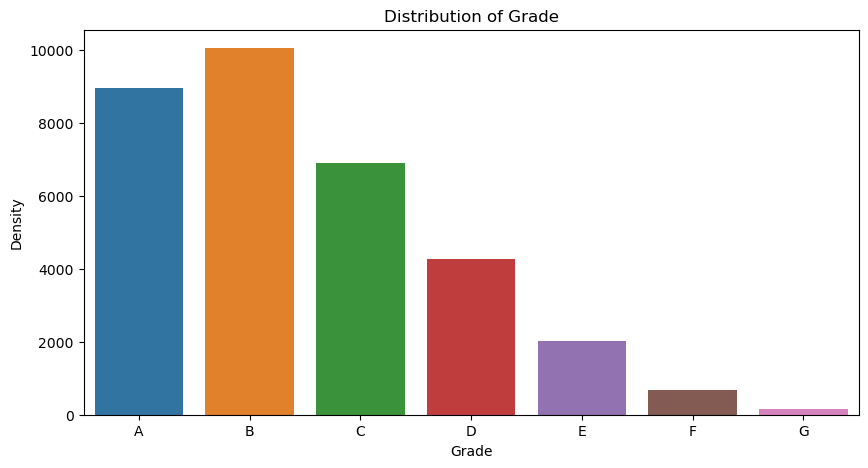

In [54]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='grade', data=loan_df, ax=ax)
ax.set_title('Distribution of Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Density')
plot.show()

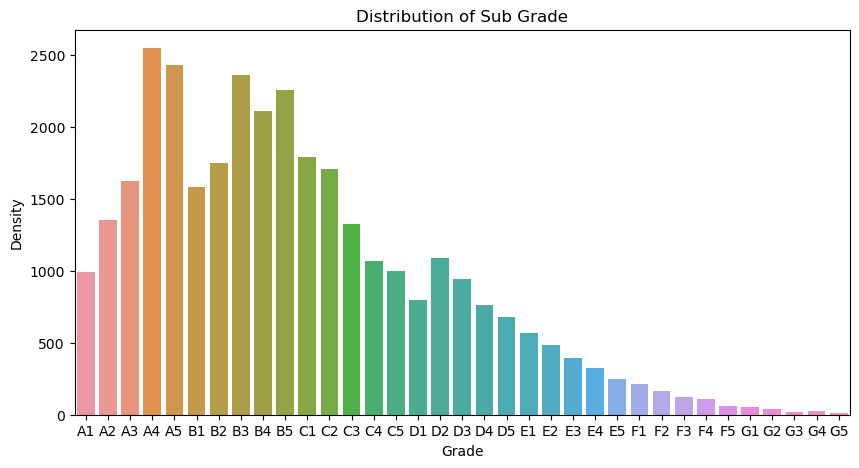

In [55]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='sub_grade', data=loan_df, ax=ax)
ax.set_title('Distribution of Sub Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Density')
plot.show()

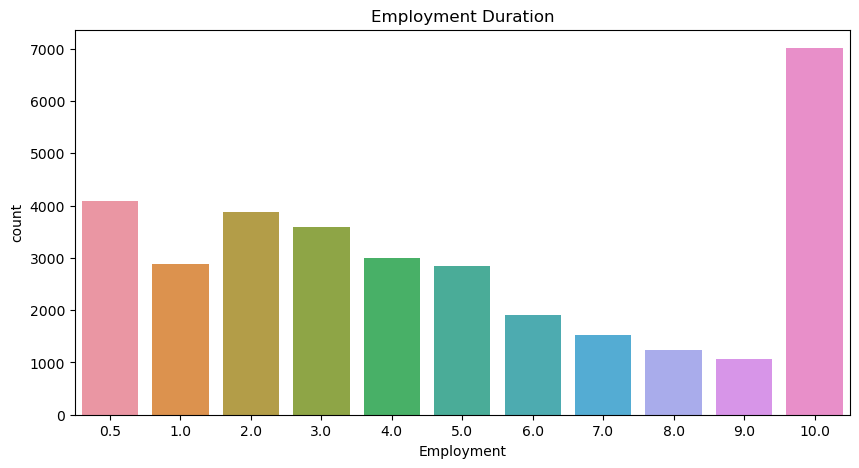

In [56]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='emp_length', data=loan_df, ax=ax)
ax.set_title('Employment Duration')
ax.set_xlabel('Employment')
ax.set_ylabel('count')
plot.show()

**Insights:**
1. Majority of the loan applicants have 10+ years of work experience.

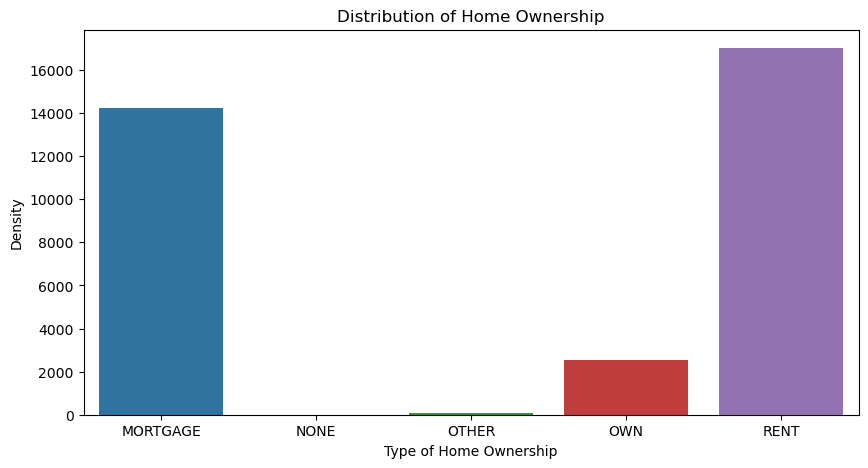

In [184]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='home_ownership', data=loan_df, ax=ax)
ax.set_title('Distribution of Home Ownership')
ax.set_xlabel('Type of Home Ownership')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. Majority of the loan applicants either live on rent or mortgage.
2. The number of loan applicants who own an home/property is vert less.

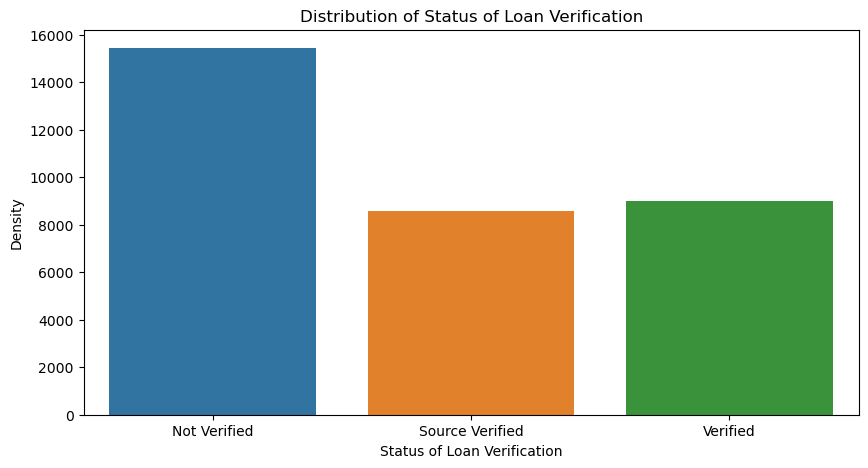

In [58]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='verification_status', data=loan_df, ax=ax)
ax.set_title('Distribution of Status of Loan Verification')
ax.set_xlabel('Status of Loan Verification')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. More number of loan applications have not been verified.
2. If we combine source verified and verified the data for loan verification that has been verified is more than unverified data.

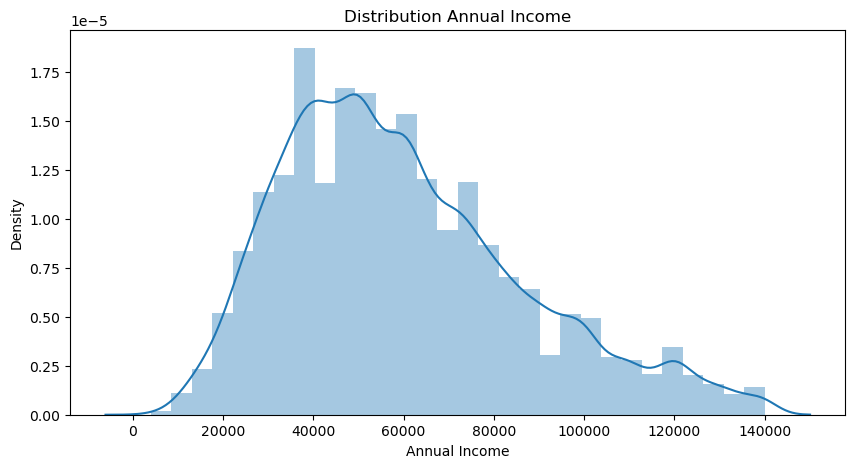

In [186]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.distplot(loan_df['annual_inc'],kde=True,bins=30)
ax.set_title('Distribution Annual Income')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. Majority of the loan applicant's annual income lies between 40000 to 80000.

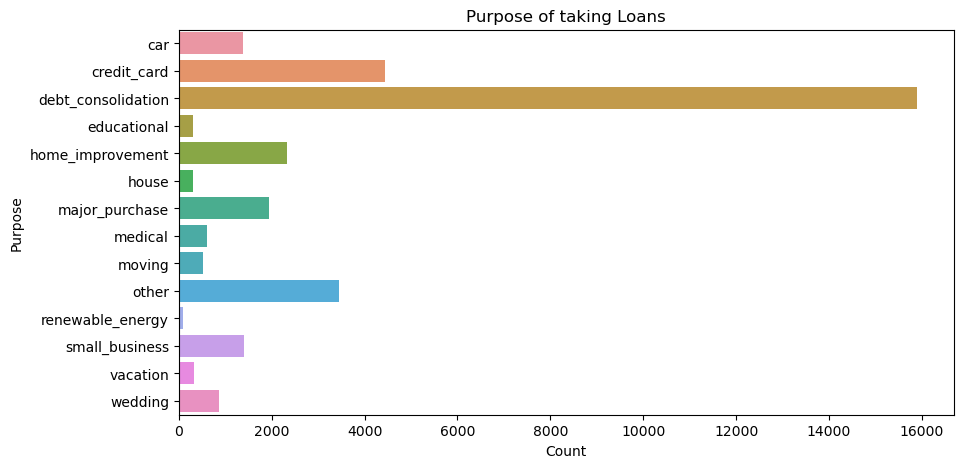

In [187]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(y='purpose', data=loan_df, ax=ax)
ax.set_title('Purpose of taking Loans')
ax.set_xlabel('Count')
ax.set_ylabel('Purpose')
plot.show()

**Insights:**
1. Majority of the loan applicants have applied for loans for debt consolidation followed by credit card bills and other

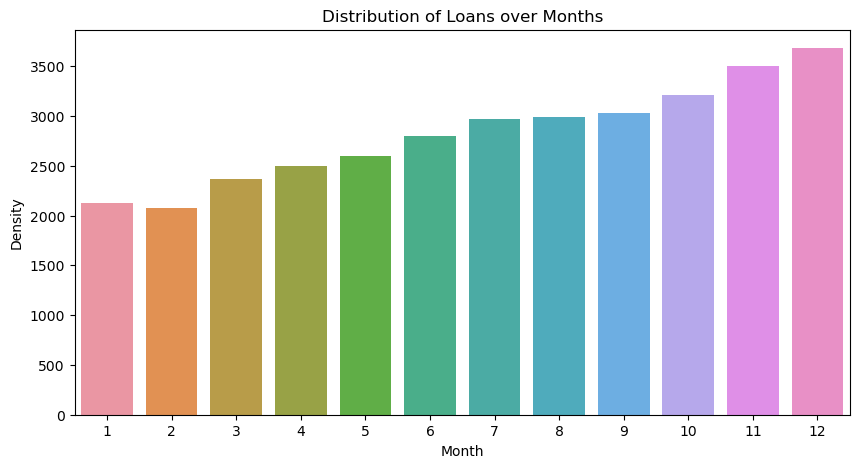

In [189]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='issue_month', data=loan_df, ax=ax)
ax.set_title('Distribution of Loans over Months')
ax.set_xlabel('Month')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. Majority of the loan applicants have opted for loans in the last quarter of the year.

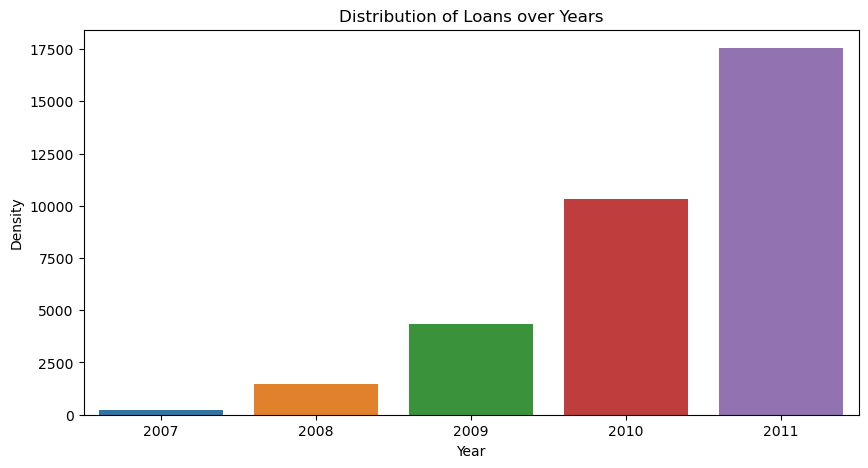

In [190]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='issue_year', data=loan_df, ax=ax)
ax.set_title('Distribution of Loans over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Density')
plot.show()

**Insights:**
1. There is a drastic increase in loan applications in the year 2011.

**BIVARIATE ANALYSIS**

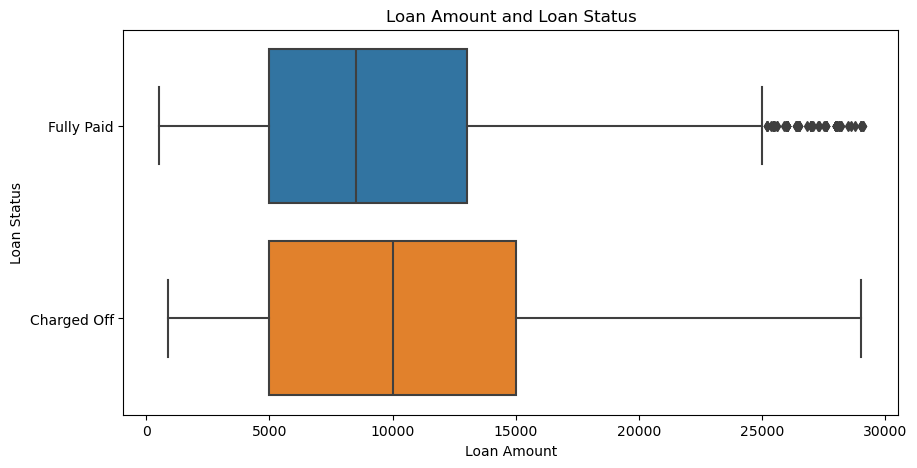

In [191]:
plot.figure(figsize=(10,5))
sea.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plot.xlabel('Loan Amount')
plot.ylabel('Loan Status')
plot.title('Loan Amount and Loan Status',fontsize=12)
plot.show()

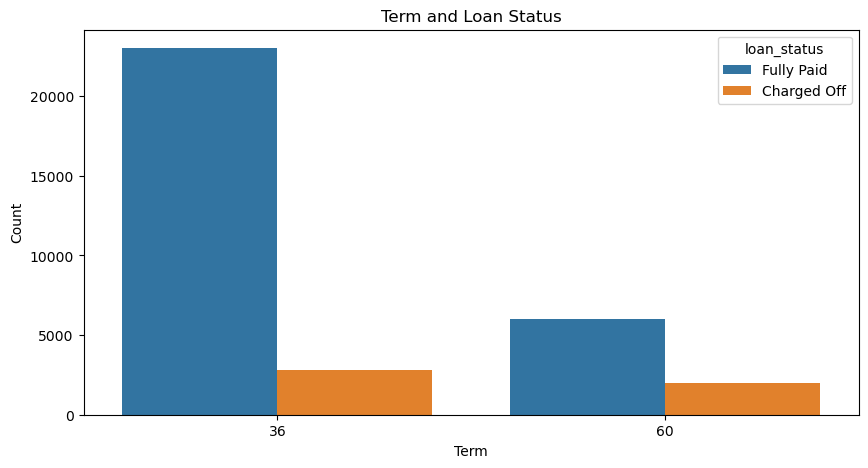

In [192]:
# Distribution of Term based on loan_status
plot.figure(figsize=(10,5))
sea.countplot(data=loan_df,x='term',hue='loan_status')
plot.xlabel('Term')
plot.ylabel('Count')
plot.title('Term and Loan Status',fontsize=12)
plot.show()

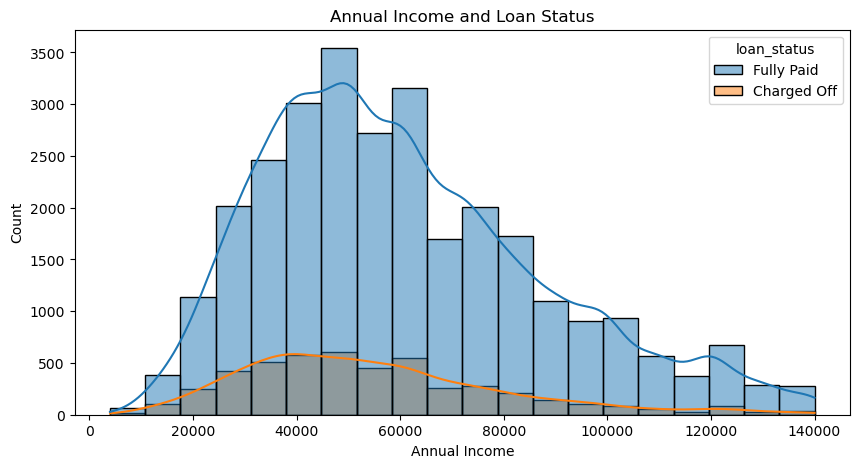

In [195]:
# Distribution of annual_inc based on loan_status
plot.figure(figsize=(10,5))
sea.histplot(data=loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plot.xlabel('Annual Income')
plot.ylabel('Count')
plot.title('Annual Income and Loan Status',fontsize=12)
plot.show()

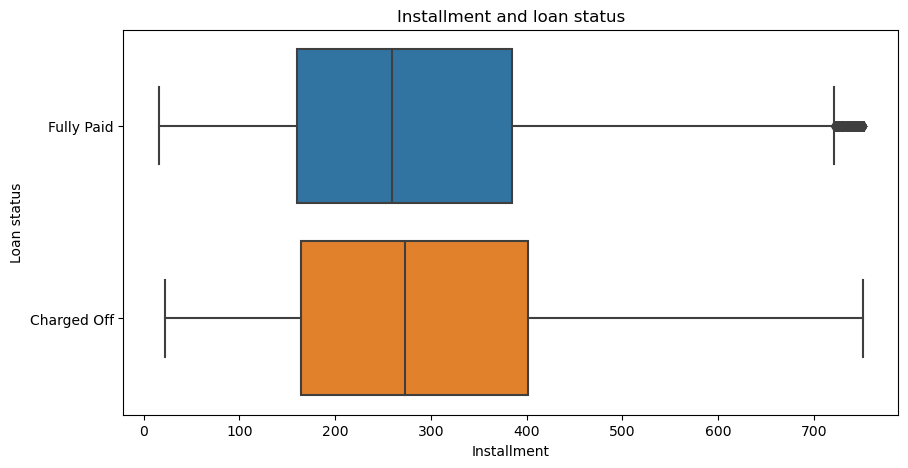

In [193]:
plot.figure(figsize = (10,5))
sea.boxplot(data=loan_df, x='installment',y='loan_status')
plot.xlabel('Installment')
plot.ylabel('Loan status')
plot.title('Installment and loan status')
plot.show()

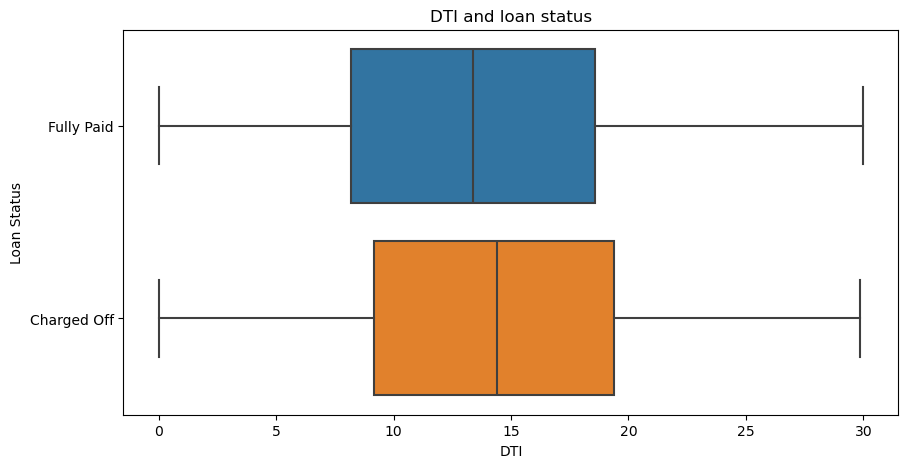

In [194]:
# Distribution of DTI based on Grade
plot.figure(figsize = (10,5))
sea.boxplot(data=loan_df, x='dti',y='loan_status')
plot.xlabel('DTI')
plot.ylabel('Loan Status')
plot.title('DTI and loan status')
plot.show()

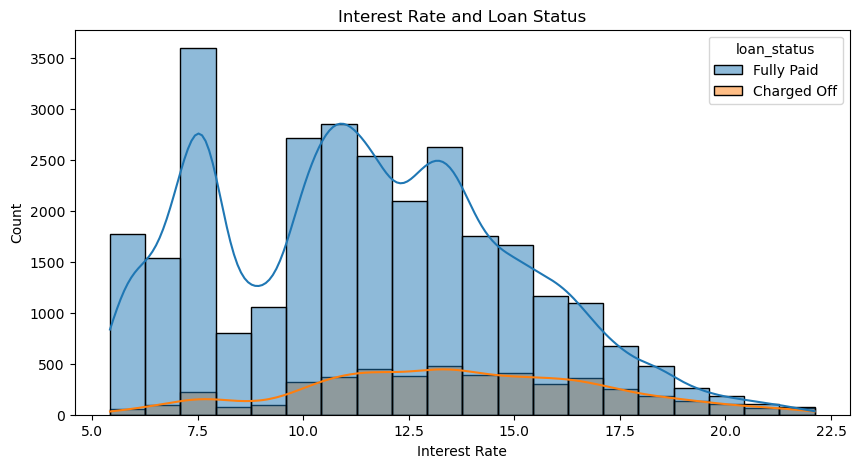

In [198]:
plot.figure(figsize=(10,5))
sea.histplot(data=loan_df,x='int_rate',hue='loan_status', bins=20, kde=True)
plot.xlabel('Interest Rate')
plot.ylabel('Count')
plot.title('Interest Rate and Loan Status',fontsize=12)
plot.show()

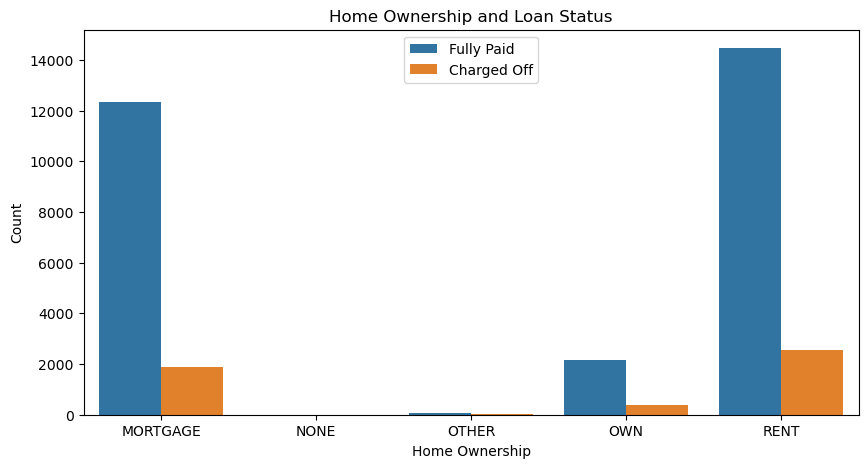

In [196]:
# Distribution of house_ownership based on loan_status
plot.figure(figsize=(10,5))
sea.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plot.xlabel('Home Ownership')
plot.ylabel('Count')
plot.title('Home Ownership and Loan Status',fontsize=12)
plot.legend(loc='upper center')
plot.show()

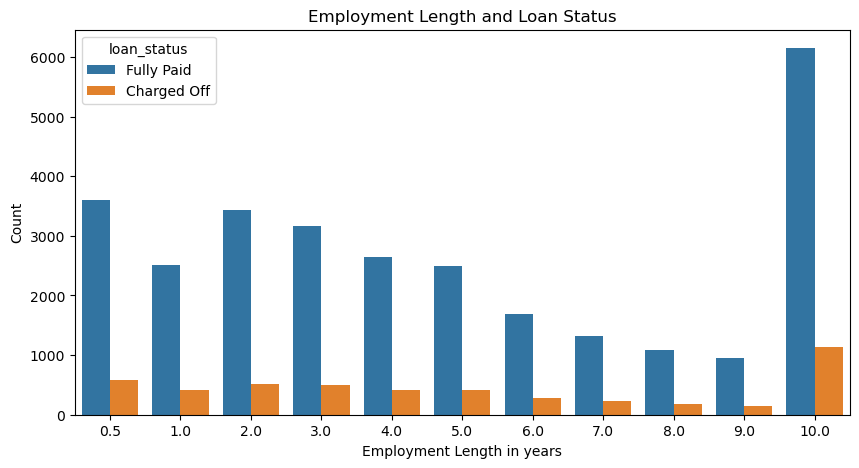

In [199]:
plot.figure(figsize=(10,5))
sea.countplot(data=loan_df,x='emp_length',hue='loan_status')
plot.xlabel('Employment Length in years')
plot.ylabel('Count')
plot.title('Employment Length and Loan Status',fontsize=12)
plot.show()

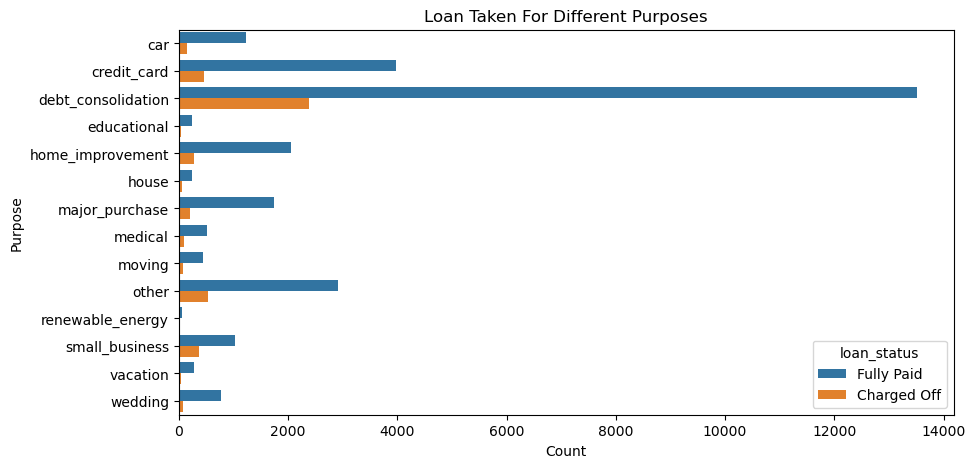

In [62]:
plot.figure(figsize=(10,5))
sea.countplot(data=loan_df,y='purpose',hue='loan_status')
plot.xlabel('Count')
plot.ylabel('Purpose')
plot.title('Loan Taken For Different Purposes',fontsize=12)
plot.show()

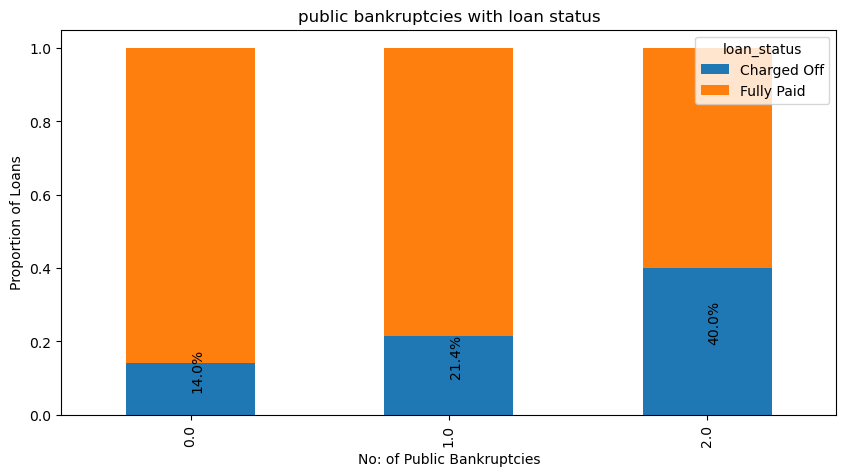

In [205]:
axes=pbc_loan.set_index('pub_rec_bankruptcies').plot(kind='bar', stacked=True)
fig=axes.get_figure()

for i, row in pbc_loan.iterrows():
    plot.text(i, row['Charged Off']/2, "{:.1%}".format(row['Charged Off']), rotation=90)

plot.xlabel('No: of Public Bankruptcies')
plot.ylabel('Proportion of Loans')

fig.set_size_inches((10,5))
plot.title('public bankruptcies with loan status')
plot.show()

In [70]:
grade_loan = pd.crosstab(index=loan_df['grade'], columns=loan_df['loan_status'], normalize=0).reset_index()
grade_loan

loan_status,grade,Charged Off,Fully Paid
0,A,0.059895,0.940105
1,B,0.122688,0.877312
2,C,0.172129,0.827871
3,D,0.223524,0.776476
4,E,0.268870,0.731130
5,F,0.316100,0.683900
6,G,0.353333,0.646667


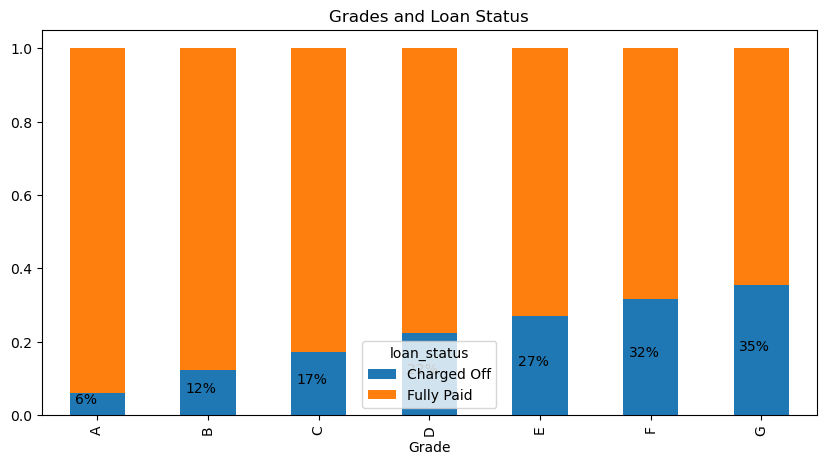

In [72]:
grade_loan.set_index('grade').plot(kind='bar', stacked=True,figsize=(10,5))

for idx, row in grade_loan.iterrows():
    plot.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plot.xlabel('Grade')
plot.title('Grades and Loan Status')
plot.show()

In [73]:
subgrade_loan = pd.crosstab(index=loan_df['sub_grade'], columns=loan_df['loan_status'], normalize=0).reset_index()
subgrade_loan.head()

loan_status,sub_grade,Charged Off,Fully Paid
0,A1,0.024218,0.975782
1,A2,0.049593,0.950407
2,A3,0.052276,0.947724
3,A4,0.062402,0.937598
4,A5,0.082614,0.917386


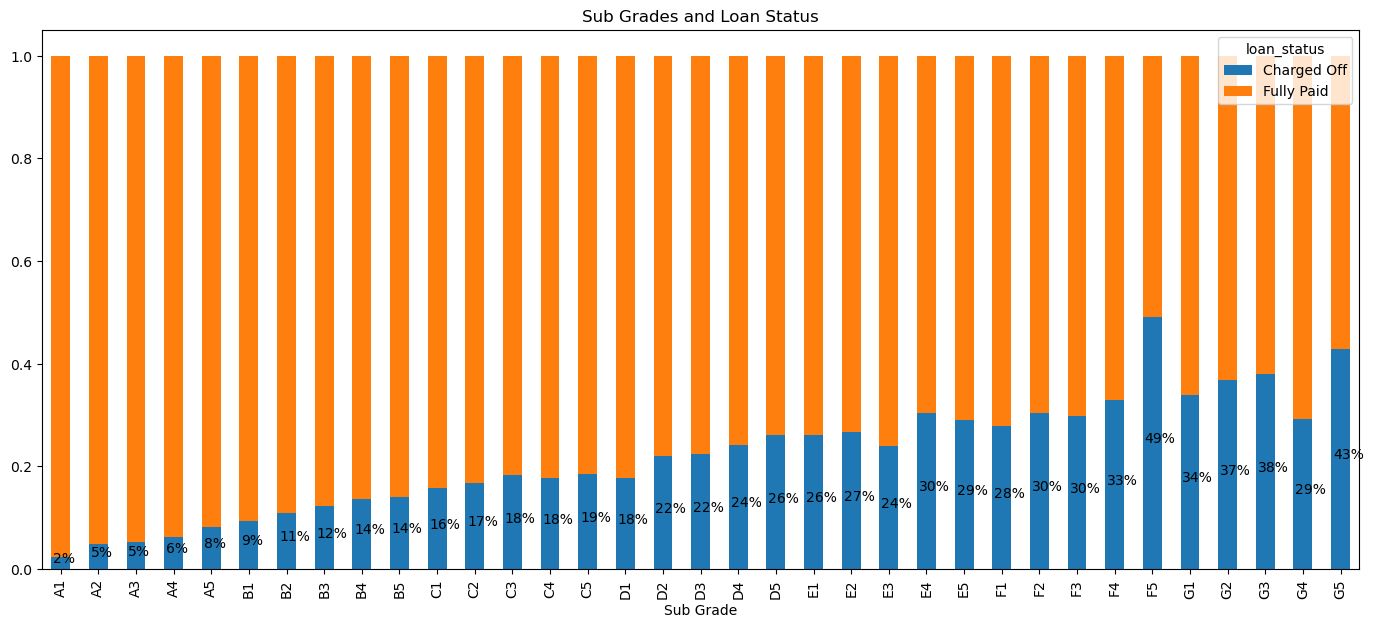

In [80]:
subgrade_loan.set_index('sub_grade').plot(kind='bar', stacked=True,figsize=(17,7))

for idx, row in subgrade_loan.iterrows():
    plot.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plot.xlabel('Sub Grade')
plot.title('Sub Grades and Loan Status')
plot.show()

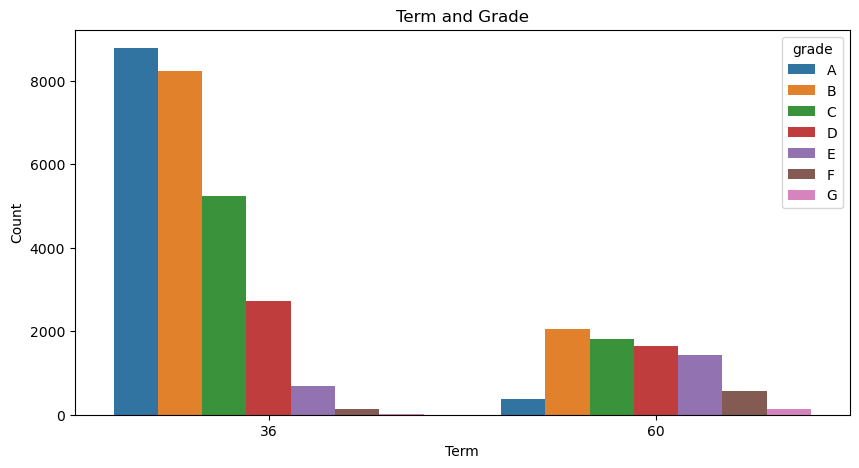

In [197]:
plot.figure(figsize=(10,5))
sea.countplot(data=loan_df,x='term',hue='grade')
plot.xlabel('Term')
plot.ylabel('Count')
plot.title('Term and Grade',fontsize=12)
plot.show()

In [82]:
pbc_loan = pd.crosstab(index=loan_df['pub_rec_bankruptcies'], columns=loan_df['loan_status'], normalize=0).reset_index()
pbc_loan

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid
0,0.0,0.139784,0.860216
1,1.0,0.214286,0.785714
2,2.0,0.400000,0.600000


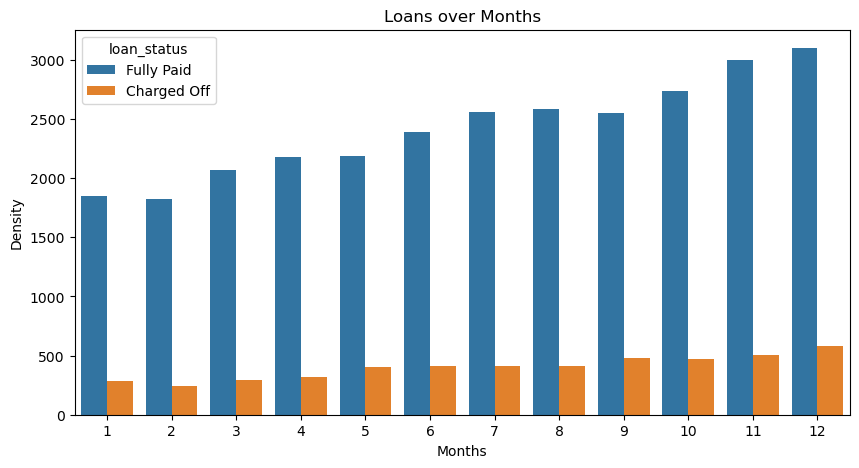

In [203]:
fig, ax = plot.subplots(figsize=(10, 5))
sea.countplot(x='issue_month',hue='loan_status', data=loan_df, ax=ax)
ax.set_title('Loans over Months')
ax.set_xlabel('Months')
ax.set_ylabel('Density')
plot.show()

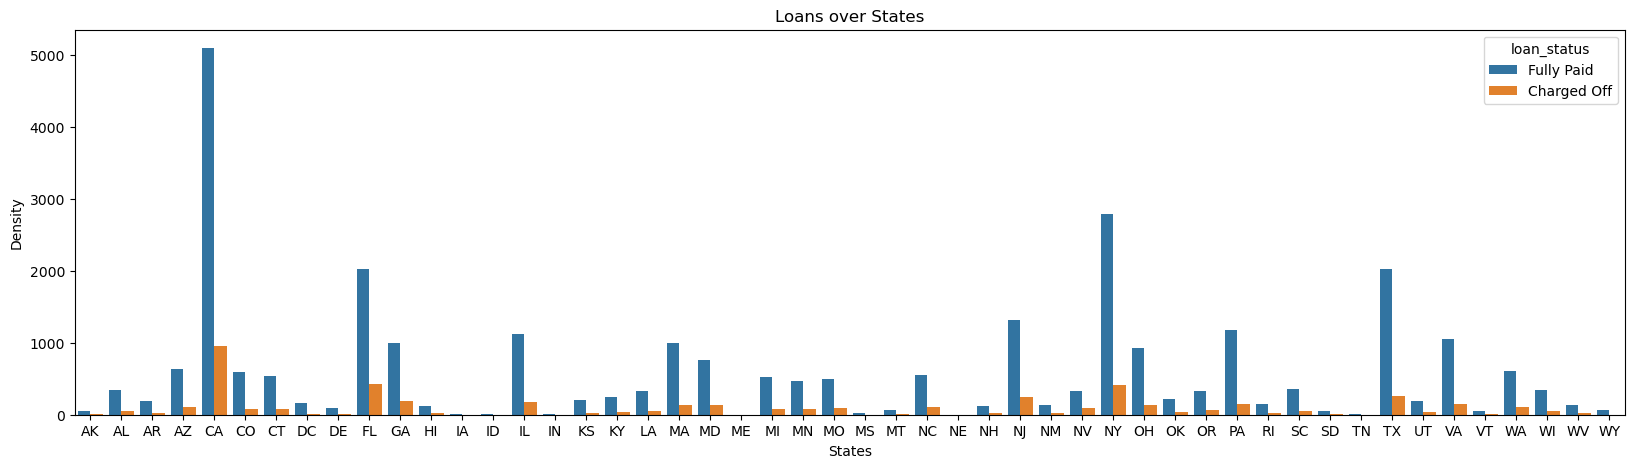

In [204]:
fig, ax = plot.subplots(figsize=(20, 5))
sea.countplot(x='addr_state',hue='loan_status', data=loan_df, ax=ax)
ax.set_title('Loans over States')
ax.set_xlabel('States')
ax.set_ylabel('Density')
plot.show()

In [102]:
# Select only numeric columns
loan_df_numeric = loan_df.select_dtypes(include=[np.number])

In [85]:
corr_matrix = loan_df_numeric.corr()

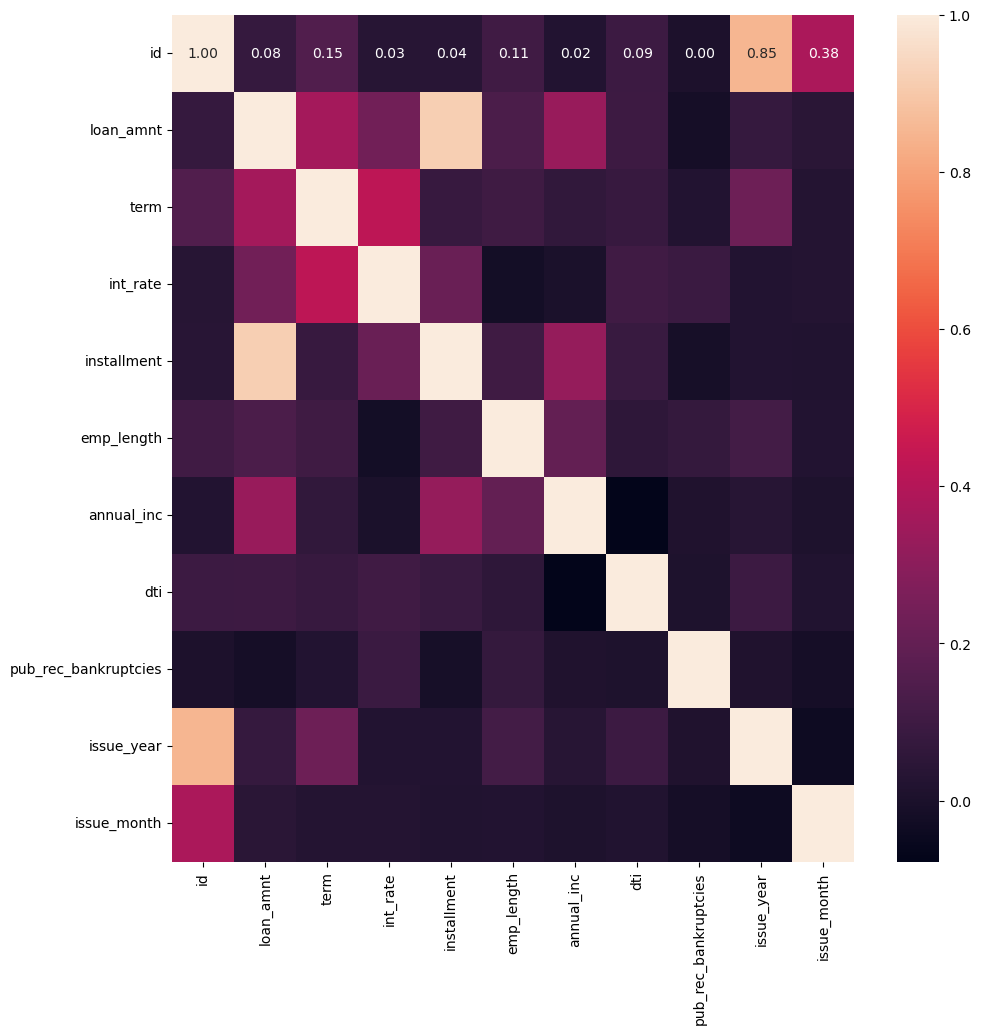

In [106]:
# Plot the heatmap
plot.figure(figsize=(11,11))
sea.heatmap(corr_matrix, annot=True, fmt='.2f')
plot.show()